<a href="https://colab.research.google.com/github/dhanyab123/hello-world/blob/main/Titanic_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Problem**

---




Using the Titanic dataset, building convincing visual data to give answers for the following questions.
 

*   Which gender has the highest chance of surviving?
*   Did class contribute to passenger survival? If yes, how?
*   What is the minimum age required to increase the chances of survival?
*   Was there any particular family that ensured the safety of all its family members?
*   How many different families were on the Titanic. (You can only consider a family if there are more than 3 members with the same second name)
*   Did male passengers have to pay more than female passengers?
*   What was the average cost of the ticked based on class, gender and age?




---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter 

In [ ]:
# ship = pd.read_csv('full.csv')
# test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

---
## Which gender has the highest chance of surviving?

In [ ]:
len(train.loc[(train['Survived'] == 1.0) & (train['Sex'] == 'female')])

233

In [ ]:
len(train.loc[(train['Survived'] == 1.0) & (train['Sex'] == 'male')])

109

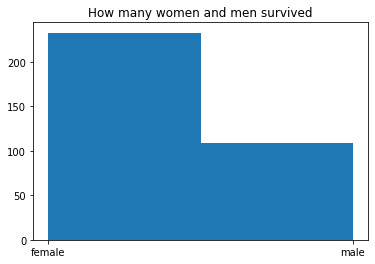

In [ ]:
sur = train.loc[train['Survived'] == 1.0] 
plt.hist(sur['Sex'], 2) 
plt.title('How many women and men survived') 
plt.show()

Here we can see that most of the people who survived identified as female and so we can infer that they were more likely to survive than the males.

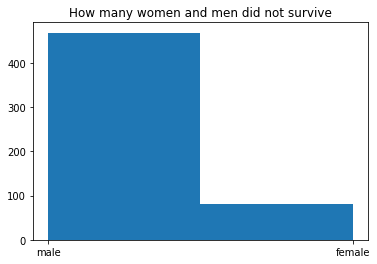

In [ ]:
nosur = train.loc[~(train['Survived'] == 1.0)] 
plt.hist(nosur['Sex'], 2) 
plt.title('How many women and men did not survive') 
plt.show()

While on the other hand looking at the people who unfortunately did not survive there is clear indication that men were more likely to not have survived.

---
## Did class contribute to passenger survival? If yes, how?

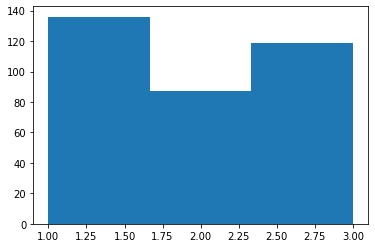

In [ ]:
plt.hist(sur['Pclass'], 3)
plt.show()

Here we can notice that most of the people who survived were from the first class closely followed by third class and finally the second class, so interestingly the second class passengers were less likely to survive than the third class passengers.

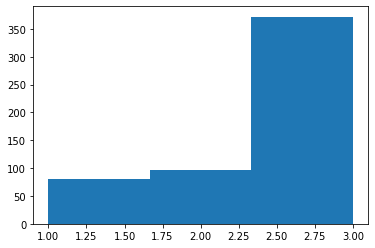

In [ ]:
plt.hist(nosur['Pclass'], 3) 
plt.show()

Here while looking at the people who have not survived we see that most of the people who have not survived belong to the third class so clearly our first inference is really wrong.


In [ ]:
# Assigning constants 

t1 = len(train.loc[(train['Pclass'] == 1)])
t1s = len(train.loc[(train['Pclass'] == 1) & (train['Survived'] == 1.0)])
t1d = len(train.loc[(train['Pclass'] == 1) & ~(train['Survived'] == 1.0)])

t2 = len(train.loc[(train['Pclass'] == 2)])
t2s = len(train.loc[(train['Pclass'] == 2) & (train['Survived'] == 1.0)])
t2d = len(train.loc[(train['Pclass'] == 2) & ~(train['Survived'] == 1.0)])

t3 = len(train.loc[(train['Pclass'] == 3)])
t3s = len(train.loc[(train['Pclass'] == 3) & (train['Survived'] == 1.0)])
t3d = len(train.loc[(train['Pclass'] == 3) & ~(train['Survived'] == 1.0)])


In [ ]:
print('class 1 : ', t1,'\n survived : ', t1s,'\tno survive : ', t1d) 
print('class 2 : ', t2,'\n survived : ', t2s,'\tno survive : ', t2d)
print('class 3 : ', t3,'\n survived : ', t3s,'\tno survive : ', t3d)

class 1 :  216 
 survived :  136 	no survive :  80
class 2 :  184 
 survived :  87 	no survive :  97
class 3 :  491 
 survived :  119 	no survive :  372


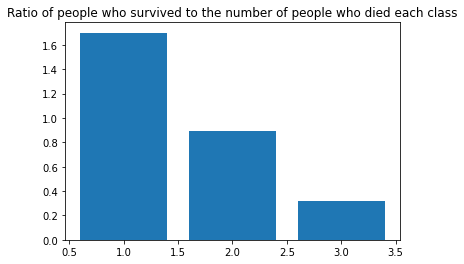

In [ ]:
# Percents of people who died and lived in each class

c1s = t1s * 100 / t1
c1d = t1d * 100 / t1

c2s = t2s * 100 / t2
c2d = t2d * 100 / t2

c3s = t3s * 100 / t3
c3d = t3d * 100 / t3

rat = [c1s/c1d,c2s/c2d,c3s/c3d]
plt.bar([1,2,3],rat)
plt.title('Ratio of people who survived to the number of people who died each class')
plt.show()

Here we can clearly see that people in the first class were significantly much more likely to live than compared to the people in the other two classes.

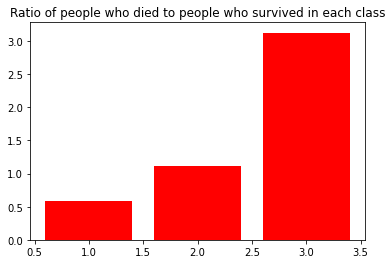

In [ ]:
invrat = [c1d/c1s,c2d/c2s,c3d/c3s]
plt.bar([1,2,3],invrat, color='red')
plt.title('Ratio of people who died to people who survived in each class')
plt.show()

People in the third class were very very unlucky, probably should've gone for a better holiday choice than a cruise.

---
## What is the minimum age required to increase the chances of survival?

In [ ]:
# Assigning constants

ms = sur.loc[sur['Sex']=='male']
fs = sur.loc[~(sur['Sex']=='male')]

md = nosur.loc[nosur['Sex']=='male']
fd = nosur.loc[~(nosur['Sex']=='male')]

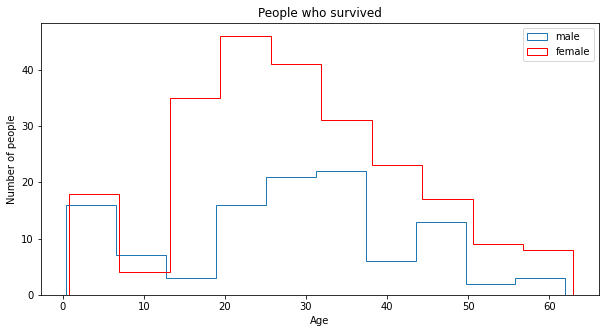

In [ ]:
msage=[]
fsage=[]

for i in ms['Age_wiki']:
  if np.isnan(i) == False:
    msage.append(i)

for i in fs['Age_wiki']:
  if np.isnan(i) == False:
    fsage.append(i)
    
a=plt.figure()
a.set_figwidth(10)
a.set_figheight(5)
plt.hist(msage,histtype='step', label = 'male',)
plt.hist(fsage,histtype='step', color = 'red', label = 'female')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('People who survived')
plt.legend()
plt.show()

Most women who survived were around the age of 14-30, while most men who survived were around the age 19- 38.

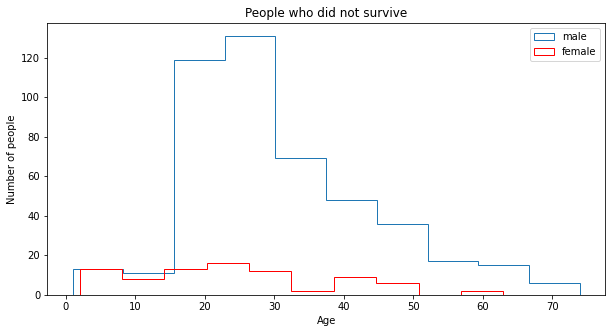

In [ ]:
mdage=[]
fdage=[]

for i in md['Age_wiki']:
  if np.isnan(i) == False:
    mdage.append(i)

for i in fd['Age_wiki']:
  if np.isnan(i) == False:
    fdage.append(i)
    
a=plt.figure()
a.set_figwidth(10)
a.set_figheight(5)
plt.hist(mdage,histtype='step', label = 'male')
plt.hist(fdage,histtype='step', color = 'red', label = 'female')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('People who did not survive')
plt.legend()
plt.show()

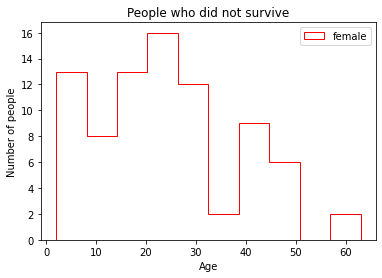

In [ ]:
plt.hist(fdage,histtype='step', color = 'red', label = 'female')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('People who did not survive')
plt.legend()
plt.show()

Most of the men who died were around the age of 16-30, while the most of the women who died were around 15-30.

---
## Was there any particular family that ensured the safety of all its family members?

In [ ]:
name1 = train['Name']
name2 = []

# Separating the first half of the name
for i in name1:
  name2.append(i.split(',')[0])

# Creating a new data frame with the names and the family names and the survived value
data = {'Name' : name1, 'Fam' : name2, 'Sur' : train['Survived'] }
datfr = pd.DataFrame(data)

# Printing the new dataframe
datfr


,Name,Fam,Sur
0,"Braund, Mr. Owen Harris",Braund,0.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,1.0
2,"Heikkinen, Miss. Laina",Heikkinen,1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,1.0
4,"Allen, Mr. William Henry",Allen,0.0
...,...,...,...
886,"Montvila, Rev. Juozas",Montvila,0.0
887,"Graham, Miss. Margaret Edith",Graham,1.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,0.0
889,"Behr, Mr. Karl Howell",Behr,1.0


Number of families that survived: 32


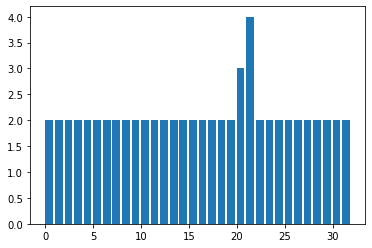

In [ ]:
# This cell considers two people or more with the same second name as a family

d = Counter(datfr['Fam'])
yy = []
fam = 0

for i in d:
  if d.get(i) > 1:
    g = datfr.loc[(datfr['Fam'] == i)]
    if len(g.loc[g['Sur']==1.0]) == len(g['Sur']):
      yy.append(len(g['Sur']))
      # print(g)
      fam+=1
      
xx=[i for i in range(len(yy))]

print('Number of families that survived:', fam)

plt.bar(xx,yy, align='edge')
plt.show()

Number of families that survived: 1


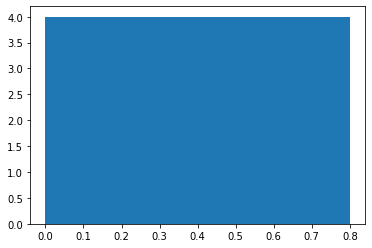

In [ ]:
# This cell considers more than 3 people with the same second name as a family

d = Counter(datfr['Fam'])
yy = []
fam = 0

for i in d:
  if d.get(i) > 3:
    g = datfr.loc[(datfr['Fam'] == i)]
    if len(g.loc[g['Sur']==1.0]) == len(g['Sur']):
      # print(g)
      yy.append(len(g['Sur']))
      fam+=1
      
xx = [i for i in range(len(yy))]

print('Number of families that survived:', fam)

plt.bar(xx,yy, align='edge')
plt.show()

---
## How many different families were on the Titanic. 

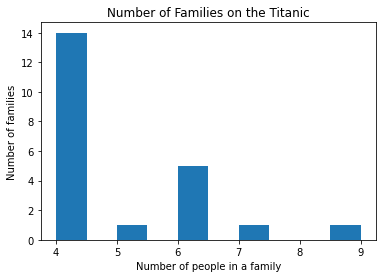

There were 22 families on the titanic


In [ ]:
name=[]

for i in train['Name']:
  name.append(i.split(',')[0])

fam = 0
c = Counter(name)

for i in c:
  if c.get(i) > 3:
    fam+=1

e=[]

for i in c.values():
  if i > 3:
    e.append(i)

plt.hist(e)
plt.xlabel('Number of people in a family')
plt.ylabel('Number of families')
plt.title('Number of Families on the Titanic')
plt.show()
print('There were', fam,'families on the titanic')

---
## Did male passengers have to pay more than female passengers?

### In class 1

In [ ]:
m = train.loc[(train['Sex'] == 'male') & (train['Pclass'] == 1)]
f = train.loc[(train['Sex'] == 'female') & (train['Pclass'] == 1)]

# len(m) = 122  ; len(f) = 94

# Taking a sample of 90 values from each as the number of men is greater than the number of women
m = m.sample(90)
f = f.sample(90)


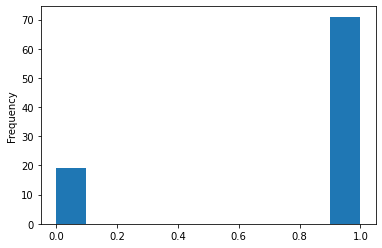

In [ ]:
# Resetting the indexes of the values and combining them into one dataframe so as to compare the value of the price they paid

# Resetting index
y = m.reset_index(drop=True)
z = f.reset_index(drop=True)

# Combining the two series
dun = pd.concat([y['Fare'], z['Fare']], axis = 1, ignore_index=True)

# Renaming the columns
dun.columns = ['mfare', 'ffare']

# Creating a column called 'fare comp' which compares the value of the fares paid by women and men. 
# It returns True if the fare paid by women is greater than or equal to the fare paid by the men in each row and False if vice versa.
dun['fare comp'] = dun['ffare'].ge(dun['mfare'])

# Creating another column to replace the True and False values into integers 1 and 0 for True and False values respectively.
dun['fare comp val'] = dun['fare comp'].replace([True, False], [1, 0])

# Plotting a histogram to compare the values and see who paid more
# If the graph is higher at 1.0 it indicates that the women paid more, else the men paid more
dun['fare comp val'].plot.hist()

plt.show()
del dun

The women paid more than or equal to the amount that the men paid for the fare.

### In class 2

In [ ]:
m = train.loc[(train['Sex'] == 'male') & (train['Pclass'] == 2)]
f = train.loc[(train['Sex'] == 'female') & (train['Pclass'] == 2)]

# len(m) = 108  ; len(f) = 76

# Taking a sample of 70 values from each as the number of men is greater than the number of women
m = m.sample(70)
f = f.sample(70)


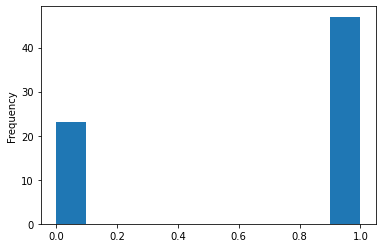

In [ ]:
# Resetting the indexes of the values and combining them into one dataframe so as to compare the value of the price they paid

# Resetting index
y=m.reset_index(drop=True)
z=f.reset_index(drop=True)

# Combining the two series
dun = pd.concat([y['Fare'], z['Fare']], axis = 1, ignore_index=True)

# Renaming the columns
dun.columns = ['mfare', 'ffare']

# Creating a column called 'fare comp' which compares the value of the fares paid by women and men. 
# It returns True if the fare paid by women is greater than or equal to the fare paid by the men in each row and False if vice versa.
dun['fare comp'] = dun['ffare'].ge(dun['mfare'])

# Creating another column to replace the True and False values into integers 1 and 0 for True and False values respectively.
dun['fare comp val'] = dun['fare comp'].replace([True, False], [1, 0])

# Plotting a histogram to compare the values and see who paid more
# If the graph is higher at 1.0 it indicates that the women paid more, else the men paid more
dun['fare comp val'].plot.hist()

plt.show()
del dun

The women paid more than or equal to the amount that the men paid.

### In class 3

In [ ]:
m = train.loc[(train['Sex'] == 'male') & (train['Pclass'] == 3)]
f = train.loc[(train['Sex'] == 'female') & (train['Pclass'] == 3)]

# len(m) = 347  ; len(f) = 144

# Taking a sample of 100 values from each as the number of men is greater than the number of women
m = m.sample(140)
f = f.sample(140)


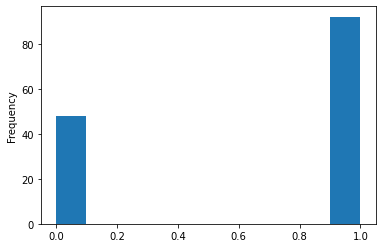

In [ ]:
# Resetting the indexes of the values and combining them into one dataframe so as to compare the value of the price they paid

# Resetting index
y=m.reset_index(drop=True)
z=f.reset_index(drop=True)

# Combining the two series
dun = pd.concat([y['Fare'], z['Fare']], axis = 1, ignore_index=True)

# Renaming the columns
dun.columns = ['mfare', 'ffare']

# Creating a column called 'fare comp' which compares the value of the fares paid by women and men. 
# It returns True if the fare paid by women is greater than or equal to the fare paid by the men in each row and False if vice versa.
dun['fare comp'] = dun['ffare'].ge(dun['mfare'])

# Creating another column to replace the True and False values into integers 1 and 0 for True and False values respectively.
dun['fare comp val'] = dun['fare comp'].replace([True, False], [1, 0])

# Plotting a histogram to compare the values and see who paid more
# If the 1.0 is higher it indicates that the women paid more, and if 0.0 is higher it indicates that the men paid more
dun['fare comp val'].plot.hist()

plt.show()
del dun

Again the women paid more than the men.

### Considering all the Passengers regardless of class

In [ ]:
m = train.loc[(train['Sex'] == 'male')]
f = train.loc[(train['Sex'] == 'female')]

# len(m) = 577  ; len(f) = 314

# Taking a sample of 310 values from each as the number of men is greater than the number of women
m = m.sample(310)
f = f.sample(310)


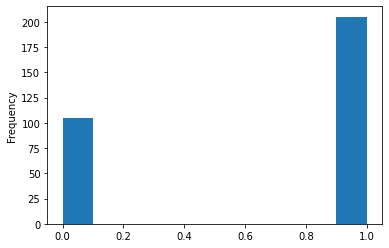

In [ ]:
# Resetting the indexes of the values and combining them into one dataframe so as to compare the value of the price they paid

# Resetting index
y=m.reset_index(drop=True)
z=f.reset_index(drop=True)

# Combining the two series
dun = pd.concat([y['Fare'], z['Fare']], axis = 1, ignore_index=True)

# Renaming the columns
dun.columns = ['mfare', 'ffare']

# Creating a column called 'fare comp' which compares the value of the fares paid by women and men. 
# It returns True if the fare paid by women is greater than or equal to the fare paid by the men in each row and False if vice versa.
dun['fare comp'] = dun['ffare'].ge(dun['mfare'])

# Creating another column to replace the True and False values into integers 1 and 0 for True and False values respectively.
dun['fare comp val'] = dun['fare comp'].replace([True, False], [1, 0])

# Plotting a histogram to compare the values and see who paid more
# If the 1.0 is higher it indicates that the women paid more, and if 0.0 is higher it indicates that the men paid more
dun['fare comp val'].plot.hist()

plt.show()
del dun

Considering all the passengers on board the women paid more than or equal to the amount that the men paid.

---
## What was the average cost of the ticked based on class, gender and age?

### Based on Class

In [ ]:
fare_1 = train.loc[(train['Pclass'] == 1)]
fare_2 = train.loc[(train['Pclass'] == 2)]
fare_3 = train.loc[(train['Pclass'] == 3)]

84.1546875


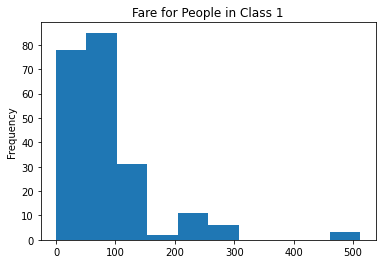

In [ ]:
print(np.average(fare_1['Fare']))
fare_1['Fare'].plot.hist()
plt.title('Fare for People in Class 1')
plt.show()

Average fare for the first class was around 84

20.662183152173913


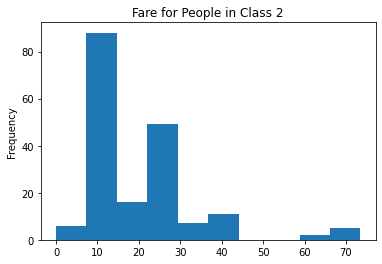

In [ ]:
print(np.average(fare_2['Fare']))
fare_2['Fare'].plot.hist()
plt.title('Fare for People in Class 2')
plt.show()

Average fare for the second class was around 20

13.675550101832993


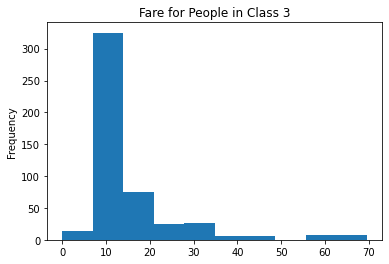

In [ ]:
print(np.average(fare_3['Fare']))
fare_3['Fare'].plot.hist()
plt.title('Fare for People in Class 3')
plt.show()

Average fare for the third class was around 13

### Based on Gender

In [ ]:
fare_male = train.loc[(train['Sex'] == 'male')]
fare_female = train.loc[(train['Sex'] == 'female')]

25.523893414211443


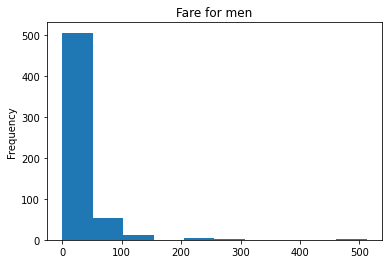

In [ ]:
# plt.figure(figsize=(10,10))
print(np.average(fare_male['Fare']))
fare_male['Fare'].plot.hist()
plt.title('Fare for men')
plt.show()

Average fare for men was around 25

44.47981783439491


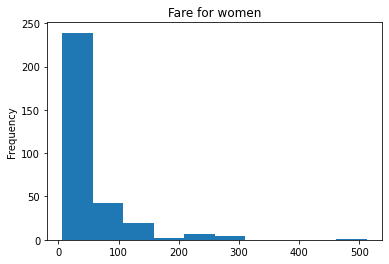

In [ ]:
# plt.figure(figsize=(10,10))
print(np.average(fare_female['Fare']))
fare_female['Fare'].plot.hist()
plt.title('Fare for women')
plt.show()

Average fare for women was around 44 

### Based on Age

In [ ]:
# min = 0.42 ;  max = 80

fare_11 = train.loc[(train['Age'] <= 10) & (train['Age'] > 0)]
fare_12 = train.loc[(train['Age'] <= 20) & (train['Age'] > 10)]
fare_13 = train.loc[(train['Age'] <= 30) & (train['Age'] > 20)]
fare_14 = train.loc[(train['Age'] <= 40) & (train['Age'] > 30)]
fare_15 = train.loc[(train['Age'] <= 50) & (train['Age'] > 40)]
fare_16 = train.loc[(train['Age'] <= 60) & (train['Age'] > 50)]
fare_17 = train.loc[(train['Age'] <= 70) & (train['Age'] > 60)]
fare_18 = train.loc[(train['Age'] <= 80) & (train['Age'] > 70)]


30.4344390625


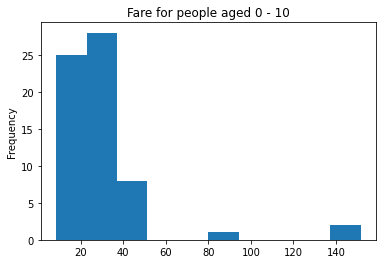

In [ ]:
print(np.average(fare_11['Fare']))
fare_11['Fare'].plot.hist()
plt.title('Fare for people aged 0 - 10')
plt.show()

Average fare for people aged 0 - 10 was around 30

29.529531304347824


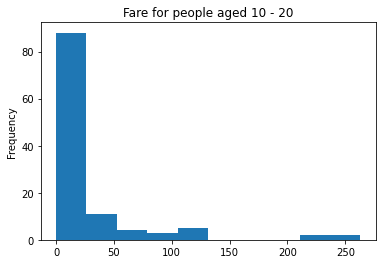

In [ ]:
print(np.average(fare_12['Fare']))
fare_12['Fare'].plot.hist()
plt.title('Fare for people aged 10 - 20')
plt.show()

Average fare for people aged 10 - 20 was around 29

28.306718695652172


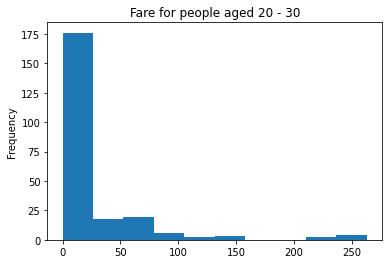

In [ ]:
print(np.average(fare_13['Fare']))
fare_13['Fare'].plot.hist()
plt.title('Fare for people aged 20 - 30')
plt.show()

Average fare for people aged 20 - 30 was around 28

42.496100000000006


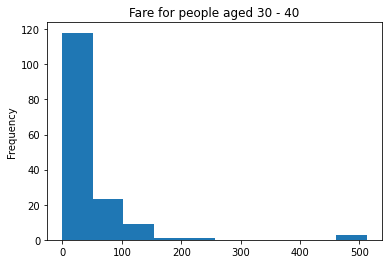

In [ ]:
print(np.average(fare_14['Fare']))
fare_14['Fare'].plot.hist()
plt.title('Fare for people aged 30 - 40')
plt.show()

Average fare for people aged 30 - 40 is around 42

41.163181395348836


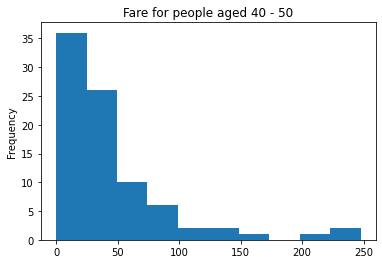

In [ ]:
print(np.average(fare_15['Fare']))
fare_15['Fare'].plot.hist()
plt.title('Fare for people aged 40 - 50')
plt.show()

Average fare for people aged 40 - 50 is around 41

44.77480238095238


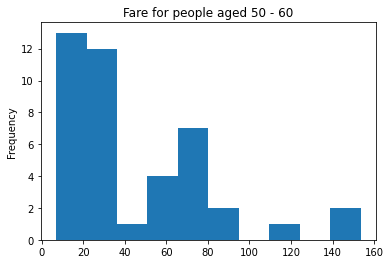

In [ ]:
print(np.average(fare_16['Fare']))
fare_16['Fare'].plot.hist()
plt.title('Fare for people aged 50 - 60')
plt.show()

Average fare for people aged 50 - 60 is around 44

45.91078235294118


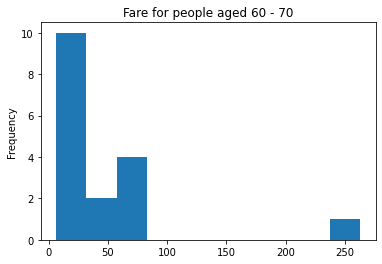

In [ ]:
print(np.average(fare_17['Fare']))
fare_17['Fare'].plot.hist()
plt.title('Fare for people aged 60 - 70')
plt.show()

Average fare for people aged 60 - 70 was around 45

25.936680000000003


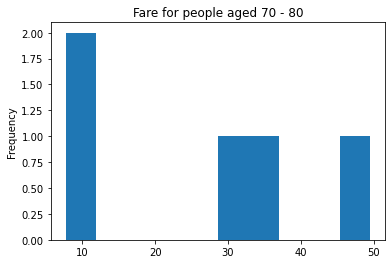

In [ ]:
print(np.average(fare_18['Fare']))
fare_18['Fare'].plot.hist()
plt.title('Fare for people aged 70 - 80')
plt.show()

Average fare for people aged 70 - 80 is around 25

---


---